In [169]:
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

In [170]:
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data['User'] = 1
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,User
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [171]:
pie_data = churn_data.groupby('Exited')['Exited'].count()
pie_data = pie_data.apply(lambda x: round(x / sum(pie_data) * 100))
pie_data

Exited
0    80
1    20
Name: Exited, dtype: int64

In [172]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title='Соотношение ушедших и лояльных клиентов',
)

fig.show()

In [173]:
pie_data = churn_data.groupby('Exited')['Exited'].count()


fig = px.pie(
    data_frame=pie_data,
    names=['Лояльные', 'Ушедшие'],
    values=pie_data,
    title='Соотношение ушедших и лояльных клиентов',
    width=500,
    height=450
    
)

fig.update_layout(legend_title='Группа')

fig.show()
fig.write_html('files to share/pie.html')

In [174]:
exited_data = churn_data.groupby('Exited', as_index=False).sum()

fig=px.histogram(
    data_frame=churn_data,
    x='Tenure',
    title='Соотношение ушедших и лояльных клиентов',
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
)


fig.show()

C:\Users\qwert\AppData\Local\Temp\ipykernel_6276\4193482046.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [175]:
exited_data = churn_data.groupby('Exited', as_index=False).sum()

fig=px.histogram(
    data_frame=churn_data,
    x='Tenure',
    title='Соотношение ушедших и лояльных клиентов',
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'})
)


fig.show()

C:\Users\qwert\AppData\Local\Temp\ipykernel_6276\2711027190.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'Количество клиентов')

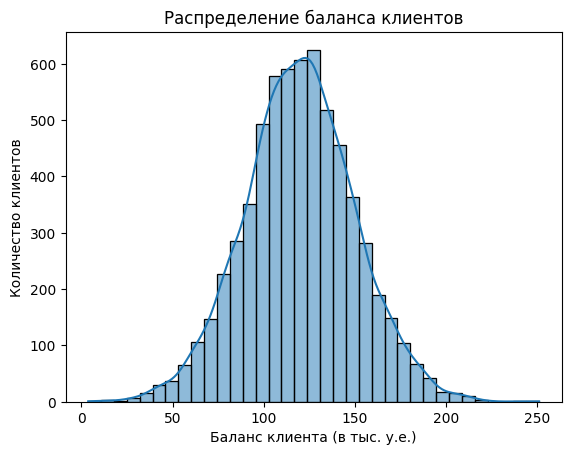

In [176]:
limited_balance = churn_data
limited_balance = limited_balance[limited_balance['Balance'] >= 2500]

histogr = sns.histplot(
    limited_balance,
    x=limited_balance['Balance'] / 1000,
    bins=35,
    kde=True,
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)')
histogr.set_ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

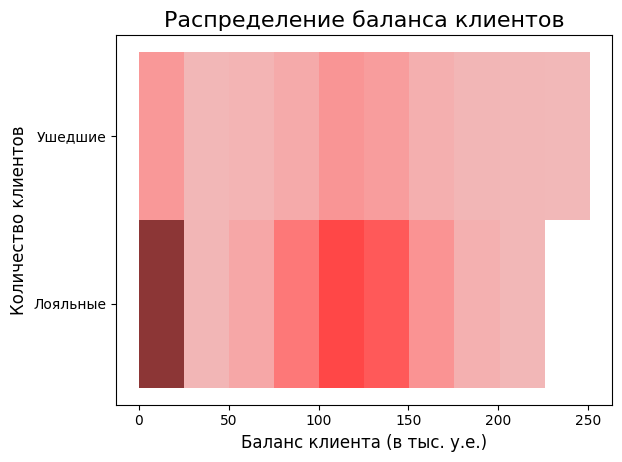

In [177]:
histogr = sns.histplot(
    churn_data,
    x=churn_data['Balance'] / 1000,
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    bins=10,
    kde=True,
    color='red'
)

histogr.set_title('Распределение баланса клиентов', fontsize=16)
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)', fontsize=12)
histogr.set_ylabel('Количество клиентов', fontsize=12)

<AxesSubplot: xlabel='Age', ylabel='Exited'>

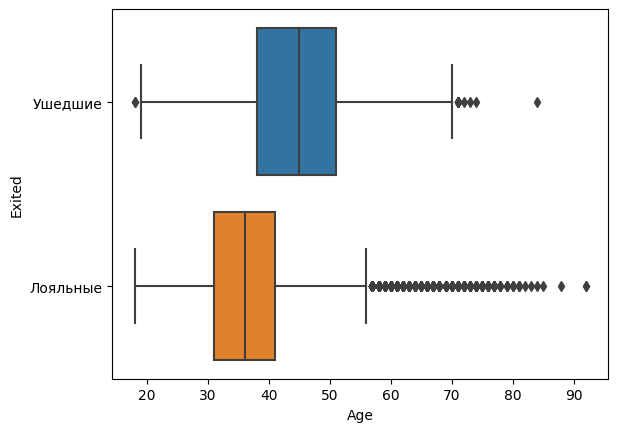

In [178]:
sns.boxplot(
    churn_data,
    x='Age',
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    width=0.8
)

In [179]:
fig = px.scatter(
    data_frame=churn_data,
    x=churn_data['EstimatedSalary'] / 1000,
    y='CreditScore',
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title= 'Зависимость кредитного рейтинга от дохода клиента',
    height=700,
    width=1100
)

fig.update_layout(
    xaxis_title='Доход клиента (в тыс. у.е.)',
    yaxis_title='Кредитный рейтинг',
    title_font_size=20,
    legend_font_size=14,
    legend_title='Группа'
)

fig.show()

In [180]:
fig = px.histogram(
    data_frame=churn_data,
    x=churn_data['EstimatedSalary'] / 1000,
    y=churn_data['CreditScore'],
    nbins=20,
    color=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    title= 'Зависимость кредитного рейтинга от дохода клиента',
    height=700,
    width=1000,
    histfunc='avg'
)

fig.update_layout(
    xaxis_title='Доход клиента (в тыс. у.е.)',
    yaxis_title='Средний кредитный рейтинг',
    title_font_size=20,
    legend_font_size=14,
    legend_title='Группа',
    bargap=0.3
)

fig.show()

In [190]:
pivot = pd.pivot_table(
    data=churn_data,
    values=churn_data['CreditScore'].round(1),
    index=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    columns=churn_data['EstimatedSalary'] 
)

fig = px.density_heatmap(
    data_frame=churn_data,
    x=churn_data['EstimatedSalary'] / 1000,
    y=churn_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    z='CreditScore',
    title= 'Зависимость кредитного рейтинга от дохода клиента',
    height=750,
    width=1100,
    histfunc='avg',
    color_continuous_scale='greens',
    nbinsx=5,
    text_auto=True
)

fig_1 = px.imshow(pivot)

fig.update_layout(
    xaxis_title='Доход клиента (в тыс. у.е.)',
    yaxis_title='Группа',
    title_font_size=20,
    legend_font_size=14,
    coloraxis_colorbar_title='Средний кредитный рейтинг'
)

fig_2 = sns.heatmap(pivot, cmap='YlGnBu')

fig.show()

KeyError: 619

In [182]:
pie_data = churn_data[churn_data['Exited'] == 1]

fig = px.pie(
    data_frame=pie_data,
    names=pie_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    title='Отношение полов',
    color_discrete_map={'Female' : 'red', 'Male':'cyan'},
    values=pie_data['User'],
    color_discrete_sequence=['#FF6692', '#17BECF']
    
)


fig.show()

In [183]:
hist_data = churn_data.groupby('Gender', as_index=False)['Exited'].mean()
hist_data['Exited'] = hist_data['Exited'].round(4)
display(hist_data)

fig = px.bar(
    data_frame=hist_data,
    y=hist_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    x=100 - hist_data['Exited'] * 100,
    color=hist_data['Gender'].map({'Female' : 'Женщины', 'Male' : 'Мужчины'}),
    title="Распределение ушедших клиентов по половому признаку",
    orientation='h',
    color_discrete_map={'Female' : 'red', 'Male' : 'blue'},
    color_discrete_sequence=['#FF6692', '#17BECF'],
    width=900,
    height=400,
    text_auto=True,
)

fig.update_layout(
    xaxis_title='Процент (%) ушедших клиентов',
    yaxis_title='Категория',
    coloraxis_colorbar_title='Категория',
    showlegend=False
)

fig.show()
    

,Gender,Exited
0,Female,0.2507
1,Male,0.1646


,Exited,NumOfProducts,User
0,0,1,3675
1,0,2,4242
2,0,3,46
3,1,1,1409
4,1,2,348
5,1,3,220
6,1,4,60


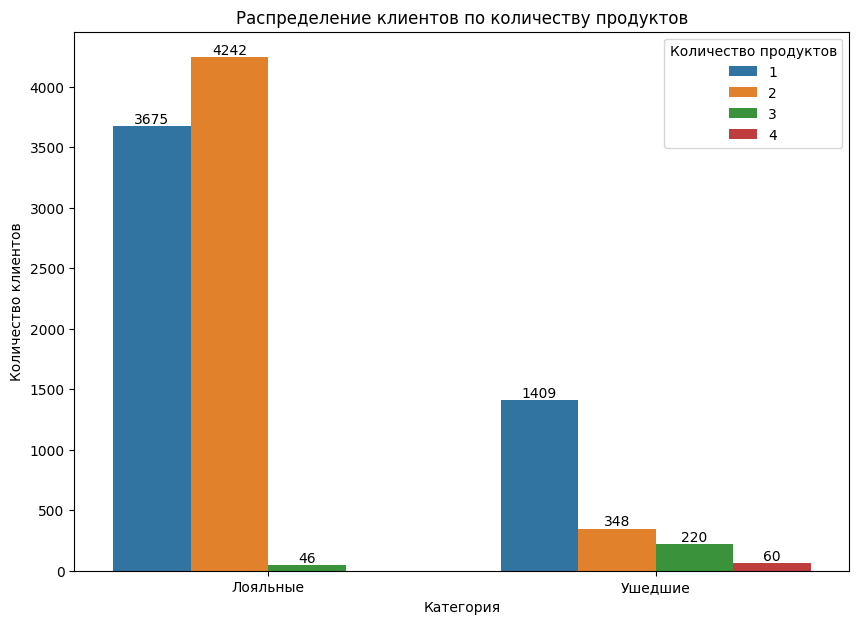

In [187]:
hist_data = churn_data.groupby(['Exited','NumOfProducts'], as_index=False)['User'].count()
display(hist_data)

fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=hist_data,
    x=hist_data['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    y='User',
    hue='NumOfProducts',
)

barplot.set_title('Распределение клиентов по количеству продуктов')
barplot.set_xlabel('Категория')
barplot.set_ylabel('Количество клиентов')
barplot.legend(title="Количество продуктов")

for i in barplot.containers:
    barplot.bar_label(i,)

In [ ]:
actives = churn_data.groupby('Exited', as_index=False)['IsActiveMember'].mean().round(4)
display(actives)

fig = px.bar(
    data_frame=actives,
    x=actives['IsActiveMember'] * 100,
    y=actives['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    color=actives['Exited'].map({1:'Ушедшие', 0:'Лояльные'}),
    color_discrete_map={1:'green', 0: 'red'},
    color_discrete_sequence=['#00CC96', '#EF553B'],
    orientation='h',
    width=900,
    height=400,
    text_auto=True
)

fig.update_layout(
    title='Процент активных членов по категориям',
    xaxis_title='Процент (%) активных членов',
    yaxis_title='Категория',
    showlegend=False
)
fig.show()
    

,Exited,IsActiveMember
0,0,0.5546
1,1,0.3608


In [ ]:
choropleth_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean().round(4)

fig = px.choropleth(
    data_frame=choropleth_data,
    locations='Geography',
    locationmode='country names',
    color=choropleth_data['Exited'] * 100,
    width=1000,
    height=700,
    color_continuous_scale='tropic',
    title='Процент (%) ушедших клиентов',
    range_color=[0, 50]
    
)

fig.update_layout(
    coloraxis_colorbar_title='Процент (%) ушедших клиентов',
)

fig.add_scattergeo(
    locations=choropleth_data['Geography'],
    locationmode='country names',
    text=choropleth_data['Exited'].round(3) * 100, 
    mode='text')

fig.show()


In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.50,20.83,13.73,16.83,13.19,23.33,24.14,12.77,19.61,27.08,25.49
Fair,21.74,21.56,21.30,21.65,19.72,20.69,23.64,17.11,20.90,19.00,20.54
Good,20.38,20.36,18.73,20.60,19.51,21.45,18.29,19.19,15.24,19.47,19.78
Poor,22.64,25.94,21.18,21.22,23.32,19.92,17.99,15.13,21.46,25.11,16.95
Very_Poor,44.44,25.37,15.15,28.57,29.31,14.93,22.54,20.63,25.35,22.95,33.33


Text(170.72222222222223, 0.5, 'Категория кредитного рейтнга')

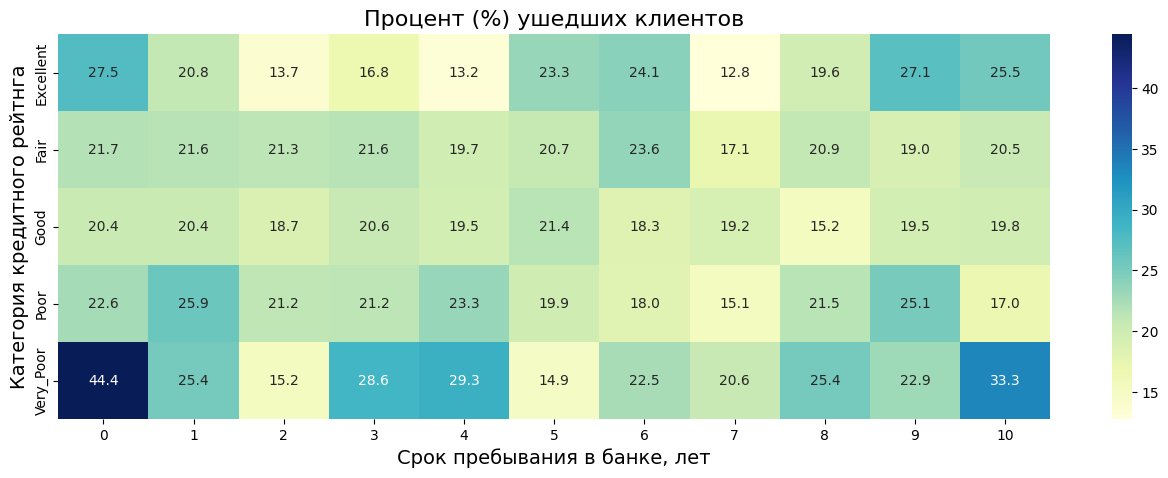

In [ ]:
pivot = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
pivot = pivot.round(4) * 100
display(pivot)

fig = plt.figure(figsize=(16, 5))

fig = sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.1f')

fig.set_title('Процент (%) ушедших клиентов', fontsize=16)
fig.set_xlabel('Срок пребывания в банке, лет', fontsize=14)
fig.set_ylabel('Категория кредитного рейтнга', fontsize=14)
